In [1]:
# importing the libraries we will use:
import pandas as pd 
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
#changing seaborn fonts and settings to Narayan's preferred look
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
import matplotlib.pylab as plt
%matplotlib inline 
#prints in the notebook
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#reading file
nhl = pd.read_csv('NHL.csv', sep=',', encoding='latin-1')
#was receiving an error due to weird characters in the file so I had to specify the encoding to read

In [3]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13056 entries, 0 to 13055
Data columns (total 31 columns):
Rk            13056 non-null int64
Player        13056 non-null object
Age           13056 non-null int64
Pos           13056 non-null object
Tm            13056 non-null object
GP            13056 non-null int64
G             13056 non-null int64
A             13056 non-null int64
PTS           13056 non-null int64
plusminus     13056 non-null int64
PIM           13056 non-null int64
PS            13056 non-null float64
EV            13056 non-null int64
PP            13056 non-null int64
SH            13056 non-null int64
GW            13056 non-null int64
EV.1          13056 non-null int64
PP.1          13056 non-null int64
SH.1          13056 non-null int64
S             13056 non-null int64
S_percent     12955 non-null float64
TOI           13056 non-null int64
ATOI          13056 non-null float64
BLK           13056 non-null int64
HIT           13056 non-null int64
FOW    

In [4]:
nhl.head()

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29,34,348,458,43.2,1,1604,2017
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,1491,19.883333,27,80,842,906,48.2,0,1104,2017
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,1754,21.400000,15,28,7,44,13.7,0,206,2017
3,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,...,1497,18.266667,33,45,685,648,51.4,0,60,2017
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,1438,19.433333,20,30,0,0,0.0,0,119,2017


In [5]:
nhl.describe()

,Rk,Age,GP,G,A,PTS,plusminus,PIM,PS,EV,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
count,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.00000,13056.000000,13056.000000,13056.000000,...,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000,13056.000000
mean,614.821998,26.692785,47.194240,7.224801,12.370558,19.595358,-0.34038,31.708563,2.392862,5.150735,...,776.121170,14.180072,25.848346,41.771982,54.866805,54.865885,19.657598,0.000996,2.806832,2011.213006
std,543.796890,4.583309,28.761689,8.727639,12.970630,20.537278,9.18817,32.541681,2.775927,5.981750,...,574.597867,5.033837,37.104141,52.432778,149.678259,142.467108,25.720397,0.031540,49.584278,4.041935
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-46.00000,0.000000,-1.900000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,252.000000,23.000000,19.000000,1.000000,2.000000,3.000000,-5.00000,8.000000,0.100000,1.000000,...,222.000000,10.895833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
50%,503.000000,26.000000,52.000000,4.000000,8.000000,13.000000,-1.00000,24.000000,1.400000,3.000000,...,742.000000,14.558333,11.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
75%,754.000000,30.000000,75.000000,11.000000,19.000000,30.000000,3.00000,46.000000,3.900000,8.000000,...,1256.250000,18.016667,35.000000,66.000000,10.000000,14.000000,44.700000,0.000000,0.000000,2015.000000
max,2644.000000,48.000000,84.000000,65.000000,96.000000,125.000000,50.00000,324.000000,17.200000,48.000000,...,2412.000000,23.983333,283.000000,382.000000,1175.000000,941.000000,100.000000,1.000000,1604.000000,2018.000000


Rk -- Rank
Age -- Age at time of finale
Scoring
GP -- Games Played
G -- Goals
A -- Assists
PTS -- Points
+/- -- Plus/Minus
PIM -- Penalties in Minutes
Point Shares
PS -- Point Shares; an estimate of the number of points contributed by a player.
Goals
EV -- Even Strength Goals
PP -- Power Play Goals
SH -- Short-Handed Goals
GW -- Game-Winning Goals
Assists
EV -- Even Strength Assists
PP -- Power Play Assists
SH -- Short-Handed Assists
Shots on Goal
S -- Shots on Goal
S% -- Shooting Percentage
Ice Time
TOI -- Time on Ice (in minutes)
ATOI -- Average Time on Ice
Blocks
BLK -- Blocks at Even Strength
HIT -- Hits at Even Strength
Faceoff Wins
FOW -- Faceoff Wins at Even Strength
Faceoff Losses
FOL -- Faceoff Losses at Even Strength
FO% -- Faceoff Win Percentage at Even Strength

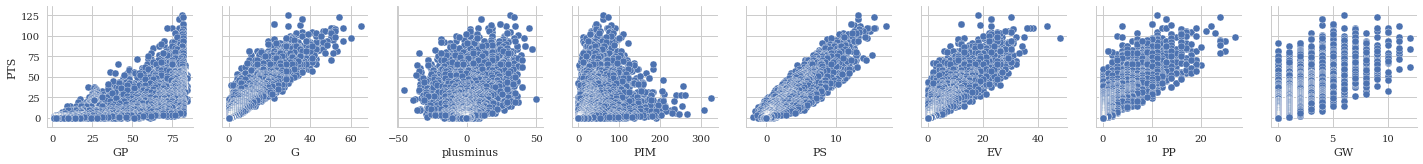

In [7]:
sns.pairplot(data=nhl,
                  y_vars=['PTS'],
                  x_vars=['GP', 'G','plusminus','PIM','PS','EV','PP','GW'])

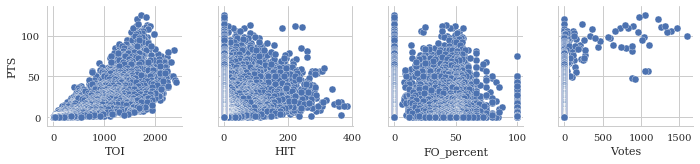

In [14]:
sns.pairplot(data=nhl,
                  y_vars=['PTS'],
                  x_vars=['TOI','HIT','FO_percent','Votes'])

In [11]:
sp.stats.pearsonr(nhl.PTS, nhl.S) #correlation and its p-value

#first number is correlation, second number is P value

(0.91606599197537819, 0.0)

In [12]:
sp.stats.pearsonr(nhl.G, nhl.TOI) 

(0.63090942003901318, 0.0)

In [13]:
sp.stats.pearsonr(nhl.PTS, nhl.Votes) 

(0.20544024926517668, 1.9705990037172526e-124)

In [143]:
sp.stats.pearsonr(nhl.HART, nhl.Votes) 

(0.745141020122285, 0.0)

In [15]:
winners = nhl[nhl['HART'] == 1]
#These are our winners from the past 14 years

In [18]:
winners = winners.

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29,34,348,458,43.2,1,1604,2017
888,1,Patrick Kane\kanepa01,27,RW,CHI,82,46,60,106,17,...,1674,20.416667,21,37,11,40,21.6,1,1395,2016
1789,4,Alex Ovechkin\ovechal01,29,LW,WSH,81,53,28,81,10,...,1646,20.333333,32,259,2,3,40.0,1,888,2015
2668,1,Sidney Crosby\crosbsi01,26,C,PIT,80,36,68,104,18,...,1758,21.966667,28,47,991,896,52.5,1,1340,2014
3556,3,Alex Ovechkin\ovechal01,27,RW,WSH,48,32,24,56,2,...,1002,20.883333,18,120,0,1,0.0,1,1090,2013
4393,1,Evgeni Malkin\malkiev01,25,C,PIT,75,50,59,109,18,...,1577,21.016667,41,29,575,635,47.5,1,1473,2012
5289,3,Corey Perry\perryco01,25,RW,ANA,82,50,48,98,9,...,1830,22.316667,41,64,9,13,40.9,1,1043,2011
6178,1,Henrik Sedin\sedinhe01,29,C,VAN,82,29,83,112,35,...,1614,19.683333,13,13,756,771,49.5,1,894,2010
7058,2,Alex Ovechkin\ovechal01,23,LW,WSH,79,56,54,110,8,...,1817,23.000000,32,243,8,24,25.0,1,1264,2009
7942,1,Alex Ovechkin\ovechal01,22,LW,WSH,82,65,47,112,28,...,1894,23.100000,44,220,7,11,38.9,1,1313,2008


In [26]:
winners

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29,34,348,458,43.2,1,1604,2017
888,1,Patrick Kane\kanepa01,27,RW,CHI,82,46,60,106,17,...,1674,20.416667,21,37,11,40,21.6,1,1395,2016
1789,4,Alex Ovechkin\ovechal01,29,LW,WSH,81,53,28,81,10,...,1646,20.333333,32,259,2,3,40.0,1,888,2015
2668,1,Sidney Crosby\crosbsi01,26,C,PIT,80,36,68,104,18,...,1758,21.966667,28,47,991,896,52.5,1,1340,2014
3556,3,Alex Ovechkin\ovechal01,27,RW,WSH,48,32,24,56,2,...,1002,20.883333,18,120,0,1,0.0,1,1090,2013
4393,1,Evgeni Malkin\malkiev01,25,C,PIT,75,50,59,109,18,...,1577,21.016667,41,29,575,635,47.5,1,1473,2012
5289,3,Corey Perry\perryco01,25,RW,ANA,82,50,48,98,9,...,1830,22.316667,41,64,9,13,40.9,1,1043,2011
6178,1,Henrik Sedin\sedinhe01,29,C,VAN,82,29,83,112,35,...,1614,19.683333,13,13,756,771,49.5,1,894,2010
7058,2,Alex Ovechkin\ovechal01,23,LW,WSH,79,56,54,110,8,...,1817,23.000000,32,243,8,24,25.0,1,1264,2009
7942,1,Alex Ovechkin\ovechal01,22,LW,WSH,82,65,47,112,28,...,1894,23.100000,44,220,7,11,38.9,1,1313,2008


In [22]:
print ('The most MVP votes a player received over the past ten years: {}' .format(nhl['Votes'].max()))

The most MVP votes a player received over the past ten years: 1604


In [25]:
group = winners.groupby('Votes').sum()

In [34]:
winners


,Rk,Age,GP,G,A,PTS,plusminus,PIM,PS,EV,...,S_percent,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Season
Votes,,,,,,,,,,,,,,,,,,,,,
888,4,29,81,53,28,81,10,58,12.6,28,...,13.4,1646,20.333333,32,259,2,3,40.0,1,2015
894,1,29,82,29,83,112,35,48,13.5,23,...,17.5,1614,19.683333,13,13,756,771,49.5,1,2010
1016,1729,28,82,38,56,94,35,24,13.2,22,...,17.9,1688,20.583333,0,0,0,0,0.0,1,2004
1043,3,25,82,50,48,98,9,104,13.3,32,...,17.2,1830,22.316667,41,64,9,13,40.9,1,2011
1058,859,26,81,29,96,125,31,61,13.3,18,...,14.9,1728,21.333333,0,0,0,0,0.0,1,2006
1090,3,27,48,32,24,56,2,36,8.0,16,...,14.5,1002,20.883333,18,120,0,1,0.0,1,2013
1225,1,19,79,36,84,120,10,60,13.3,23,...,14.4,1640,20.766667,0,0,0,0,0.0,1,2007
1264,2,23,79,56,54,110,8,72,14.5,36,...,10.6,1817,23.000000,32,243,8,24,25.0,1,2009
1313,1,22,82,65,47,112,28,40,17.2,43,...,14.6,1894,23.100000,44,220,7,11,38.9,1,2008


In [27]:
nhl.rank(ascending=False).head()

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,13050.0,10262.0,12575.5,11208.5,8616.5,589.0,364.5,14.5,32.5,146.0,...,613.5,917.5,3897.0,5480.5,832.5,561.0,3513.5,7.0,1.0,1204.5
1,13037.0,1603.5,3803.5,11208.5,3874.5,3333.0,35.5,354.5,80.5,588.5,...,1723.5,1655.0,4129.5,2533.5,50.0,4.0,2576.5,6535.0,8.0,1204.5
2,13024.0,3348.0,4617.0,1223.0,10219.0,589.0,184.5,113.5,80.5,1246.5,...,565.0,779.0,5847.5,5996.5,3555.5,2306.0,5330.0,6535.0,43.0,1204.5
3,13011.0,3798.0,3803.5,11208.5,209.0,589.0,928.0,42.5,104.0,588.5,...,1675.0,3020.5,3471.0,4593.5,168.0,171.5,1625.5,6535.0,66.5,1204.5
4,12998.0,3714.0,9958.0,1223.0,2718.0,3544.5,74.0,354.5,113.0,956.5,...,2023.5,1968.5,5085.0,5824.0,9219.0,9422.0,9219.0,6535.0,54.5,1204.5


In [28]:
counts = nhl.groupby('Pos').size()
print(counts)

Pos
C        3696
C/LW        3
D        4474
LW       2436
LW/C        1
LW/RW       2
RW       2443
RW/LW       1
dtype: int64


In [30]:
counts1 = nhl.groupby('Age').size()
print(counts1)

Age
18.0     40
19.0    163
20.0    391
21.0    618
22.0    809
23.0    959
24.0    960
25.0    889
26.0    834
27.0    764
28.0    675
29.0    589
30.0    547
31.0    463
32.0    390
33.0    326
34.0    257
35.0    220
36.0    177
37.0    122
38.0     76
39.0     43
40.0     22
41.0      8
42.0      4
43.0      3
44.0      1
45.0      2
46.0      1
47.0      1
48.0      1
dtype: int64


In [183]:
counts2 = nhl.groupby('Tm').size()
print(counts2)

Tm
ANA    305
ARI     98
ATL    114
BOS    320
BUF    324
CAR    303
CBJ    332
CGY    325
CHI    321
COL    327
DAL    305
DET    319
EDM    341
FLA    318
LAK    300
MIN    331
MTL    317
NJD    338
NSH    314
NYI    344
NYR    295
OTT    322
PHI    320
PHX    206
PIT    330
SJS    298
STL    308
TBL    316
TOR    322
TOT    762
VAN    339
VEG     22
WPG    194
WSH    326
dtype: int64


In [30]:
mvps = nhl[(nhl.HART == 1)] # grouping by MVP status
mvps.shape

(13, 31)

In [31]:
regulars = nhl[(nhl.HART == 0)&(nhl.PTS > 90)] #those who have never won an MVP award but had great seasons defined by > 95 points
regulars.shape

(63, 31)

In [32]:
print('The percentage of players who have won an MVP over the past ten years is: ', float(len(mvps)/float(len(nhl))*100), '%.') 

The percentage of players who have won an MVP over the past ten years is:  0.09957107843137254 %.


In [204]:
print ('The average points scored for all NHL players over the past ten years is', nhl['PTS'].mean(), '.') 
print ('The average points scored for really good NHL players over the past ten years is', regulars['PTS'].mean(), '.') 
print ('The average points scored for MVP NHL players over the past ten years is', mvps['PTS'].mean(), '.') 

The average points scored for all NHL players over the past ten years is 18.862205484743143 .
The average points scored for really good NHL players over the past ten years is 98.61538461538461 .
The average points scored for MVP NHL players over the past ten years is 98.8 .


In [209]:
allmu = nhl['PTS'].mean()
mvpmu = mvps['PTS'].mean()
allvar = nhl['PTS'].var()
mvpvar = mvps['PTS'].var()
allstd = nhl['PTS'].std()
mvpsstd = mvps['PTS'].std()
allmed = nhl['PTS'].median()
mvpmed = mvps['PTS'].median()
print ('Points statistics for all hockey players: mean:', allmu, 'median:',allmed, 'variance:', allvar, 'standard deviation:', allstd)
print ('Point statistics for MVP players: mean:', mvpmu, 'median:',mvpmed, 'variance:', mvpvar, 'standard deviation:', mvpsstd)

Points statistics for all hockey players: mean: 18.862205484743143 median: 12.0 variance: 408.1045260479753 standard deviation: 20.2015971162672
Point statistics for MVP players: mean: 98.8 median: 105.0 variance: 311.9555555555555 standard deviation: 17.66226360225539


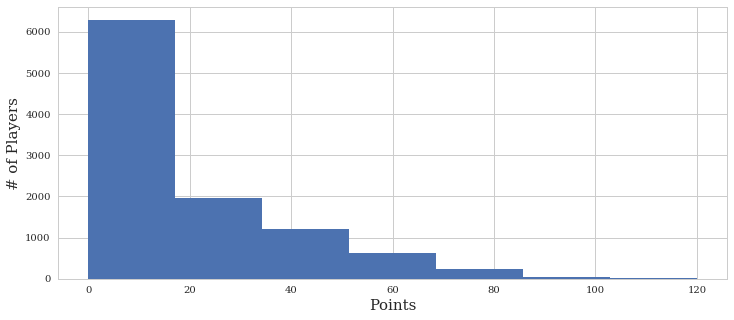

In [218]:
points = nhl['PTS']
points.hist(normed=0, histtype='stepfilled', bins=7)

plt.xlabel('Points',fontsize=15)
plt.ylabel('# of Players',fontsize=15)
plt.show()

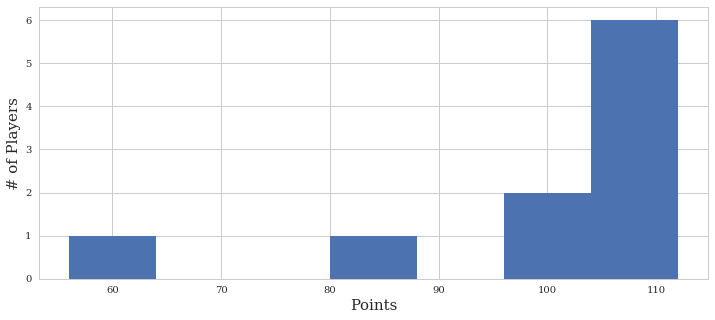

In [225]:
mvppoints = mvps['PTS']
mvppoints.hist(normed=0, histtype='stepfilled', bins=7)

plt.xlabel('Points',fontsize=15)
plt.ylabel('# of Players',fontsize=15)
plt.show()

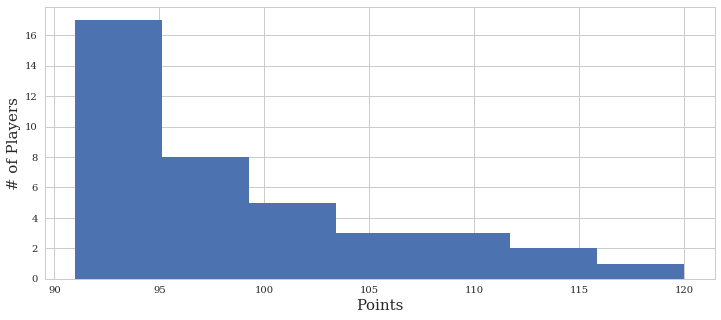

In [235]:
regpoints = regulars['PTS']
regpoints.hist(normed=0, histtype='stepfilled', bins=7)

plt.xlabel('Points',fontsize=15)
plt.ylabel('# of Players',fontsize=15)
plt.show()

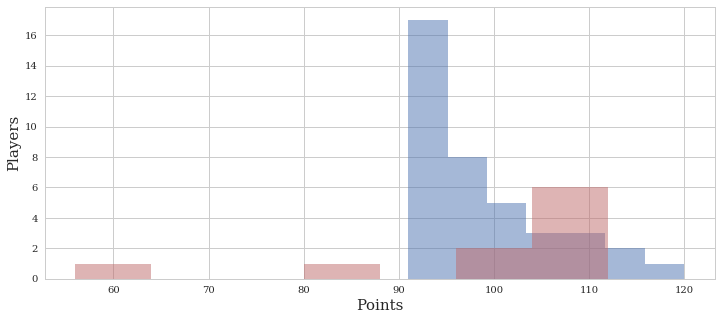

In [240]:
regpoints.hist(normed=0, histtype='stepfilled', alpha=.5, bins=7)   # default number of bins = 10
mvppoints.hist(normed=0, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=7)
plt.xlabel('Points',fontsize=15)
plt.ylabel('Players',fontsize=15)
plt.show()

The **cumulative distribution function (CDF)**, or just distribution function, describes the probability that a real-valued random variable X with a given probability distribution will be found to have a value less than or equal to x. For our example, the CDFs will be:

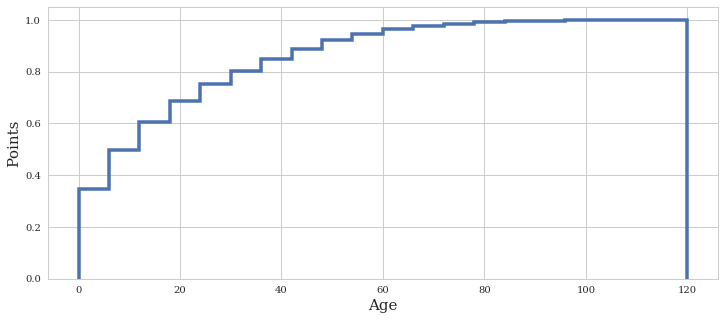

In [242]:
points.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Points',fontsize=15)
plt.show()

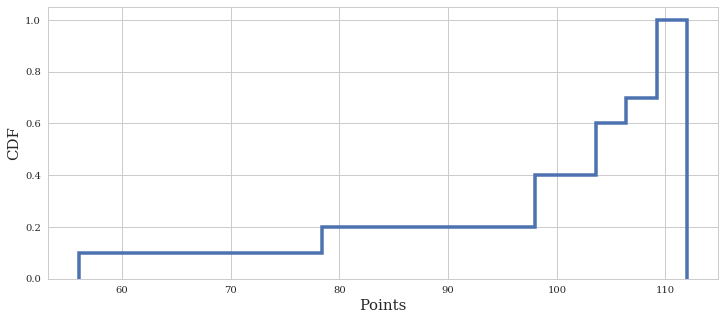

In [244]:
mvppoints.hist(normed=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Points',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

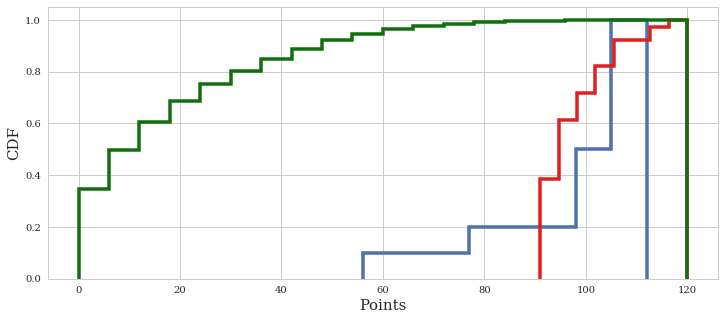

In [253]:
mvppoints.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=8)
regpoints.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=8, color=sns.desaturate("red", .75))
points.hist(normed=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20, color=sns.desaturate("green", .75))
plt.xlabel('Points',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

In [31]:
nhl.corr()

,Rk,Age,GP,G,A,PTS,plusminus,PIM,PS,EV,...,S_percent,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes
Rk,1.000000,-0.184565,-0.736427,-0.783364,-0.832245,-0.858470,-0.198950,-0.330348,-0.790059,-0.761559,...,-0.357284,-0.768780,-0.493217,-0.340491,-0.381557,-0.387181,-0.402392,-0.029397,-0.053372,-0.098685
Age,-0.184565,1.000000,0.237412,0.092096,0.160497,0.140483,-0.003394,0.183322,0.125239,0.071767,...,0.003778,0.227131,0.116846,0.188079,0.121125,0.077987,0.056280,0.055601,-0.009002,-0.011383
GP,-0.736427,0.237412,1.000000,0.639205,0.727740,0.731204,0.070142,0.583538,0.682279,0.645349,...,0.133518,0.923277,0.398914,0.602913,0.667504,0.350035,0.362865,0.022524,0.033248,0.057576
G,-0.783364,0.092096,0.639205,1.000000,0.783627,0.919875,0.216041,0.294560,0.803326,0.966654,...,0.385079,0.641489,0.358309,0.108357,0.318319,0.431417,0.449765,0.024088,0.136629,0.216100
A,-0.832245,0.160497,0.727740,0.783627,1.000000,0.964493,0.260893,0.329261,0.903676,0.734955,...,0.204634,0.816756,0.420748,0.390595,0.333825,0.437311,0.450652,0.030995,0.102862,0.181415
PTS,-0.858470,0.140483,0.731204,0.919875,0.964493,1.000000,0.256560,0.333105,0.912054,0.874970,...,0.293488,0.788375,0.417967,0.292557,0.346197,0.459681,0.475914,0.029558,0.123027,0.206407
plusminus,-0.198950,-0.003394,0.070142,0.216041,0.260893,0.256560,1.000000,0.009707,0.438413,0.235392,...,0.115741,0.127136,0.083817,0.084927,0.008313,0.033285,0.029243,-0.008703,0.060816,0.120518
PIM,-0.330348,0.183322,0.583538,0.294560,0.329261,0.333105,0.009707,1.000000,0.314042,0.295773,...,0.037931,0.478303,0.098221,0.322222,0.643384,0.112711,0.109982,-0.018059,0.023729,0.033877
PS,-0.790059,0.125239,0.682279,0.803326,0.903676,0.912054,0.438413,0.314042,1.000000,0.749069,...,0.233010,0.822127,0.437223,0.488427,0.342055,0.277875,0.286924,0.003743,0.126918,0.211365
EV,-0.761559,0.071767,0.645349,0.966654,0.734955,0.874970,0.235392,0.295773,0.749069,1.000000,...,0.393130,0.614798,0.345630,0.091775,0.335503,0.419251,0.439471,0.016932,0.126361,0.206732


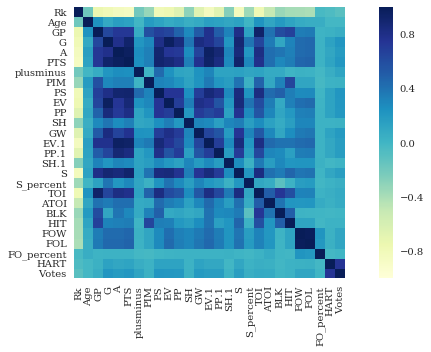

In [32]:
corrmat1 = nhl.corr()
sns.heatmap(corrmat1, square = True, cmap="YlGnBu")


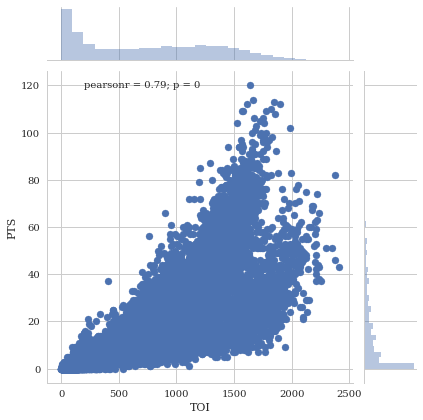

In [33]:
nhlpts =sns.jointplot(x="TOI", y="PTS", data=nhl)
nhlpts.savefig("nhlpts.jpg")
# hmm good corr and low p value.... 

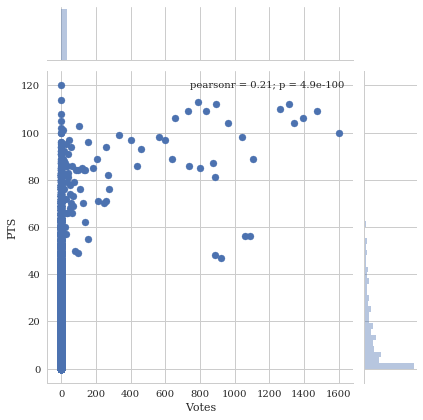

In [254]:
nhlvotes =sns.jointplot(x="Votes", y="PTS", data=nhl)
nhlpts.savefig("nhlvote.jpg")
# hmm good corr and low p value.... 

In [36]:
nozero = nhl.drop(nhl.index[(nhl.PTS < 5)]) #& (df['age']>df['age'].median() + 35) & (df['age'] > df['age'].median() -15)])
#regulars = nhl[(nhl.HART == 0)&(nhl.PTS > 90)]
nozero.shape

(9140, 31)

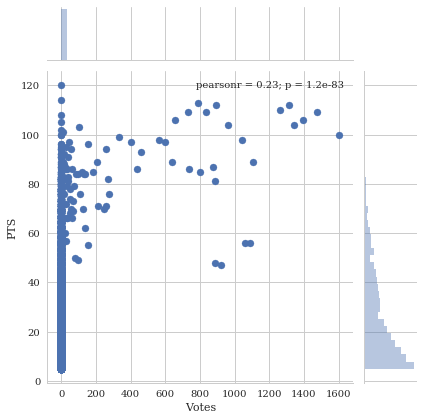

In [267]:
nhlvotes =sns.jointplot(x="Votes", y="PTS", data=nozero)
nhlpts.savefig("nhlvote.jpg")


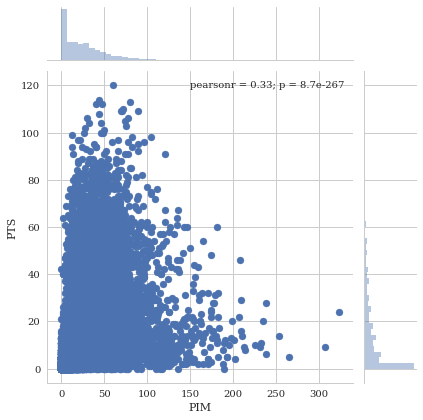

In [34]:
pim =sns.jointplot(x="PIM", y="PTS", data=nhl)
pim.savefig("pim.jpg")


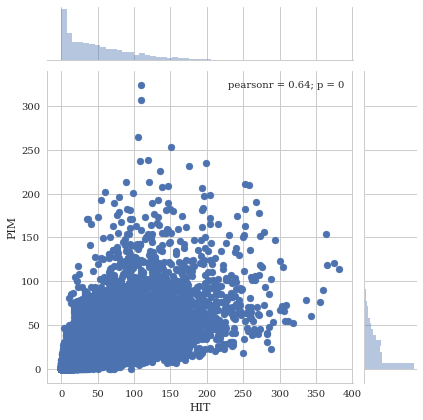

In [35]:
hits =sns.jointplot(x="HIT", y="PIM", data=nhl)
hits.savefig("hits.jpg")
#no surprise here! Correalation between hits and penalties

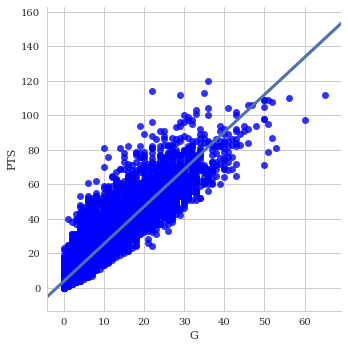

In [37]:
nhlreg = sns.lmplot("G", "PTS", nhl, order=1, ci=95, scatter_kws={'color':'b'})
plt.savefig("nhlreg.jpg")

#order = 1 is linear, 2 is expo, ... etc

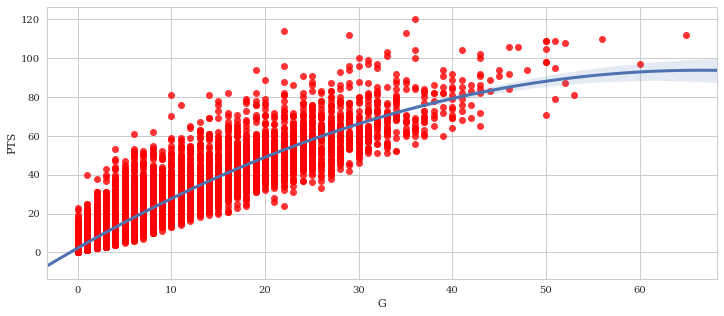

In [38]:
nhlreg2 = sns.regplot("G", "PTS", nhl, order=2, ci=95, scatter_kws={'color':'r'})
plt.savefig("reg2.jpg")

#this output looks much better

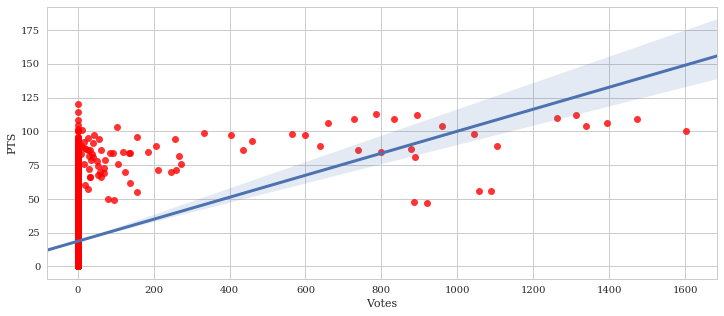

In [41]:
nhlreg2 = sns.regplot("Votes", "PTS", nhl, order=1, ci=95, scatter_kws={'color':'r'})
plt.savefig("reg2.jpg")
#possibly explore removing players with zero votes for MVP award

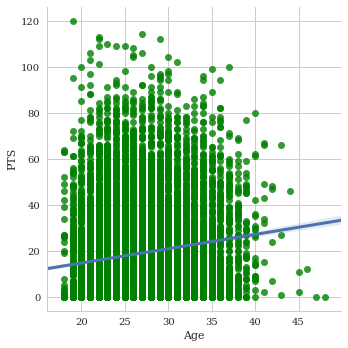

In [42]:
agereg = sns.lmplot("Age", "PTS", data=nhl,order=1, ci=95, scatter_kws={'color':'g'})
plt.savefig("age.jpg")

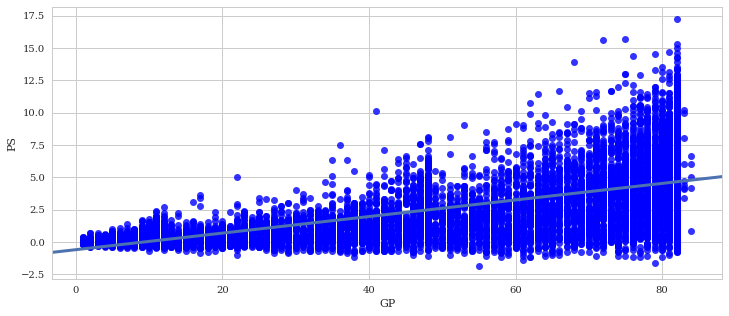

In [43]:
gamesplayed = sns.regplot("GP", "PS", data=nhl,order=1, ci=95, scatter_kws={'color':'b'})
plt.savefig("gp.jpg")

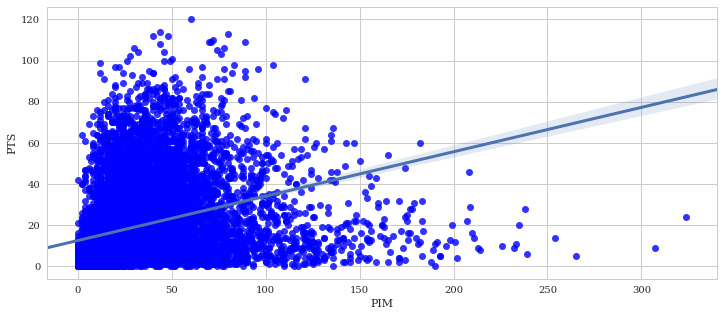

In [44]:
pimpts = sns.regplot("PIM", "PTS", data=nhl, order=1, ci=95, scatter_kws={'color':'b'})
plt.savefig("pimpts.jpg")

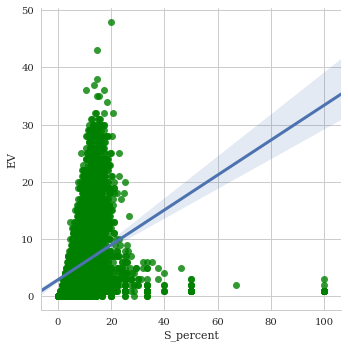

In [46]:
shots_even =sns.lmplot("S_percent", "EV", nhl, order=1, ci=95, scatter_kws={'color':'g'})
plt.savefig("shots_even.jpg")

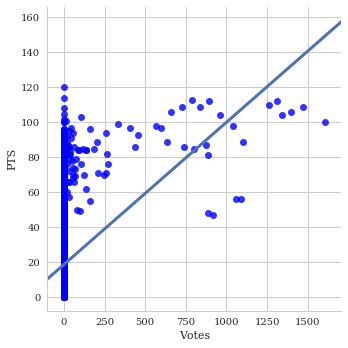

In [51]:
faceoffwin1 =sns.lmplot("Votes", "PTS", nhl, order=1, ci=0, scatter_kws={'color':'b'})
plt.savefig("faceoffwin.jpg")
#Probably would be a good idea here to remove outliers... those with 0 and 100%... most probably have zero or few attempts

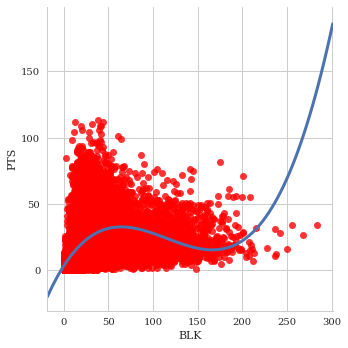

In [52]:
blocks =sns.lmplot("BLK", "PTS", nhl, order=3, ci=0, scatter_kws={'color':'r'})
plt.savefig("blocks.jpg")

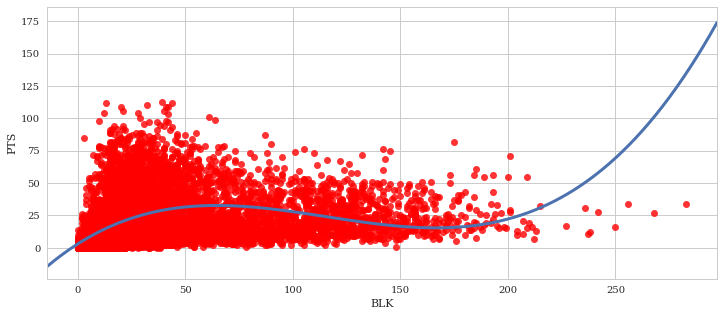

In [53]:
blocks2 =sns.regplot("BLK", "PTS", nhl, order=3, ci=0, scatter_kws={'color':'r'})
plt.savefig("blk2.jpg")


# Regression Time

In [48]:
nhln = nhl.dropna(how='any')
nozero = nozero.dropna(how='any')
print(nhl.shape)
print(nhln.shape)
print(nozero.shape)

(13056, 31)
(12955, 31)
(9140, 31)


In [40]:
#There are 3 ways of running regressions. This is the sklearn library & this is the ML version
#exploring the relationship between game winning goals and points
import sklearn.linear_model as sklm
from sklearn.metrics import mean_squared_error, r2_score
nhlreg = sklm.LinearRegression() #doing a linear regression and renaming it
X = nhln.PTS.values.reshape(12955,1) #Sklearn expects it in this array format or else it errors. Passing target variable and reshaping as a one dimensional array. Must reshape or error
Y = nhln.Votes #Y is always the response or dependent variable 
nhlreg.fit(X, Y) #fit using X and y Lin regression
print('Intercept:', nhlreg.intercept_) # intercept 
print('Beta 1:', nhlreg.coef_) #printing results AKA slope
gross_predict = nhlreg.fit(X, Y).predict(X)
MSE = mean_squared_error(Y, gross_predict) #average error in units from the prediction line i.e. diff from predicted and actual values
R2 = r2_score(Y, gross_predict)
print("Mean Squared Error:", MSE) #zer0 means the data is perfectly explained in reality we expect some error in our prediction
print("R-Squared:", R2) #57% of variation in points can be explained using this model 

Intercept: -7.01481396173
Beta 1: [ 0.49848299]
Mean Squared Error: 2372.64028946
R-Squared: 0.0423312648855


In [41]:
formula = 'Votes ~ PTS'  
model = smf.ols(formula, data=nozero) #ordinary least squares
gwreg1 = model.fit()
gwreg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Votes   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     494.8
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          8.61e-107
Time:                        14:35:12   Log-Likelihood:                -50031.
No. Observations:                9140   AIC:                         1.001e+05
Df Residuals:                    9138   BIC:                         1.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.4678      1.027    -14.092      0.000     -16.480     -12.455
PTS            0.6736      0.030     22.243      0.000       0.614       0.733
==============================================================================
Omnibus:                    18646.233   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44069165.093
Skew:                          17.250   Prob(JB):                         0.00
Kurtosis:                     341.419   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
X2 = nozero.PTS
X3 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(nozero.Votes, X3) # Creates an object OLS estimator
nhlreg2 = est.fit()
nhlreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Votes   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     494.8
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          8.61e-107
Time:                        14:35:17   Log-Likelihood:                -50031.
No. Observations:                9140   AIC:                         1.001e+05
Df Residuals:                    9138   BIC:                         1.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4678      1.027    -14.092      0.000     -16.480     -12.455
PTS            0.6736      0.030     22.243      0.000       0.614       0.733
==============================================================================
Omnibus:                    18646.233   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44069165.093
Skew:                          17.250   Prob(JB):                         0.00
Kurtosis:                     341.419   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
formula = 'Votes ~ PTS + G + A + S + EV + FOW + plusminus + PS'
model = smf.ols(formula, data=nozero) 
movreg = model.fit()
movreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Votes   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     92.16
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          2.08e-130
Time:                        14:35:20   Log-Likelihood:                -49960.
No. Observations:                9140   AIC:                         9.994e+04
Df Residuals:                    9132   BIC:                         9.999e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6285      1.266     -8.396      0.000     -13.110      -8.147
PTS            0.2505      0.095      2.627      0.009       0.064       0.437
G              0.3763      0.180      2.094      0.036       0.024       0.728
A             -0.1258      0.112     -1.123      0.262      -0.346       0.094
S             -0.1410      0.021     -6.692      0.000      -0.182      -0.100
EV             0.9283      0.334      2.781      0.005       0.274       1.583
FOW            0.0178      0.004      4.755      0.000       0.010       0.025
plusminus      0.0172      0.074      0.234      0.815      -0.127       0.162
PS             3.8953      0.570      6.833      0.000       2.778       5.013
==============================================================================
Omnibus:                    18527.620   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         42814727.230
Skew:                          17.000   Prob(JB):                         0.00
Kurtosis:                     336.568   Cond. No.                     6.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
formula = 'HART ~ G + A + S + FOW + PS'
model = smf.ols(formula, data=nozero) 
movreg = model.fit()
movreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   HART   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 07 Dec 2017   Prob (F-statistic):           6.52e-45
Time:                        14:35:23   Log-Likelihood:                 17104.
No. Observations:                9140   AIC:                        -3.420e+04
Df Residuals:                    9134   BIC:                        -3.415e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0041      0.001     -5.238      0.000      -0.006      -0.003
G              0.0005   8.68e-05      6.087      0.000       0.000       0.001
A              0.0001    6.7e-05      1.745      0.081   -1.44e-05       0.000
S          -5.171e-05   1.32e-05     -3.929      0.000   -7.75e-05   -2.59e-05
FOW        -1.063e-06   2.43e-06     -0.438      0.661   -5.82e-06    3.69e-06
PS             0.0011      0.000      3.690      0.000       0.001       0.002
==============================================================================
Omnibus:                    22127.606   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        169735768.709
Skew:                          25.527   Prob(JB):                         0.00
Kurtosis:                     668.649   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import sklearn.linear_model as sklm
from sklearn.metrics import mean_squared_error, r2_score
nhlreg3 = sklm.LinearRegression()
X = nozero[['PTS', 'PS']].as_matrix()
y = nozero.Votes
nhlreg3.fit(X,y)
print('Intercept:', nhlreg3.intercept_)
print('Game winning goals Co-ef:', nhlreg3.coef_[0])
print('Short handed goals Co-ef:', nhlreg3.coef_[1])
points_predict2 = nhlreg3.fit(X, y).predict(X)
MSE = mean_squared_error(y, points_predict2)
R2 = r2_score(y, points_predict2)
print("Mean Squared Error:", MSE)
print("R-Squared:", R2)

Intercept: -14.6829041197
Game winning goals Co-ef: 0.378737302791
Short handed goals Co-ef: 2.44932777809
Mean Squared Error: 3315.50084411
R-Squared: 0.0545747853128


In [46]:
# let's use the min/max values for setting up the grid for plotting.
nozero[['PTS', 'PS']].describe()

,PTS,PS
count,9140.000000,9140.000000
mean,27.430088,3.390120
std,19.925203,2.762549
min,5.000000,-1.600000
25%,12.000000,1.200000
50%,22.000000,2.800000
75%,39.000000,5.000000
max,125.000000,17.200000


In [279]:
# Create a coordinate grid
gww = np.arange(0,113)
shh = np.arange(0,17.2) # bounds based on min and max above

B1, B2 = np.meshgrid(gww, shh, indexing='xy')
Z = np.zeros((shh.size, gww.size))
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(nhlreg3.intercept_ + B1[i,j] * nhlreg3.coef_[0] + B2[i,j] * nhlreg3.coef_[1])

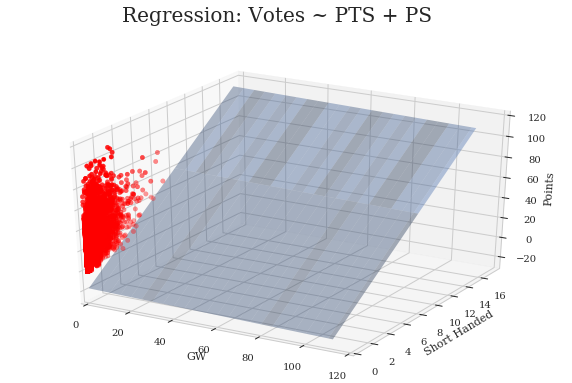

In [282]:
# Create plot
from mpl_toolkits.mplot3d import Axes3D #imports 3D graphs
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Votes ~ PTS + PS', fontsize=20)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(nhln.GW, nhln.SH, nhln.PTS, c='r')

ax.set_xlabel('GW')
ax.set_xlim(0,120)
ax.set_ylabel('Short Handed')
ax.set_ylim(ymin=0)
ax.set_zlabel('Points')
fig.savefig("salesnumfb.jpg")

Linear Regression Prediction - Using the number of MVP points as the response variable

In [47]:
#Prediction time: Splitting dataset into train and test portion.
#We develop the appropriate model onthe train portion and eval the models ability to predict using the test portion
len(nhln)

12955

In [51]:
#first, let us split the dataset to train and test portions. winners = nhl[nhl['HART'] == 1]
test =  nhln[nhl['Season'] > 2016]
train = nhln[nhl['Season'] <= 2016]

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [323]:
# splitting into the dataset to train and test portions. 
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(nhln, test_size=0.3, random_state=69)

In [52]:
print(train.shape)
print(test.shape)

(11307, 31)
(1648, 31)


In [53]:
import sklearn.linear_model as sklm
from sklearn.metrics import mean_squared_error, r2_score
trainreg = sklm.LinearRegression()
X = train[['G', 'A','PTS','plusminus','PS','EV','GW','S_percent','TOI','FO_percent']].as_matrix()
y = train.Votes
trainreg.fit(X,y)
print('Intercept:', trainreg.intercept_)
print('Goals:', trainreg.coef_[0])
print('Assists:', trainreg.coef_[1])
print('plus minus:', trainreg.coef_[2])
print('Point share:', trainreg.coef_[3])
print('Even Strength:', trainreg.coef_[4])
print('Game Winning Goals:', trainreg.coef_[5])
print('Shot percentage:', trainreg.coef_[6])
print('Time on Ice:', trainreg.coef_[7])
print('Face Off Win Percentage:', trainreg.coef_[8])

trainreg_predict=trainreg.fit(X, y).predict(X)
MSE_trainreg=mean_squared_error(y, trainreg_predict) #lower scores are better
R2_trainreg=r2_score(y, trainreg_predict)
print("Mean Squared Error:", MSE_trainreg)
print("R-Squared:", R2_trainreg)
print("Training Score:", trainreg.score(X, y)) # 1 is the best score, lower scores are worse

Intercept: 3.33198128944
Goals: -0.279191545161
Assists: 0.209968029582
plus minus: -0.0692235155791
Point share: -0.237348995839
Even Strength: 6.81953687587
Game Winning Goals: 1.17135982297
Shot percentage: 0.685055984395
Time on Ice: -0.33864643284
Face Off Win Percentage: -0.0267322788536
Mean Squared Error: 2297.55984664
R-Squared: 0.0747650572447
Training Score: 0.0747650572447


In [55]:
Xtest = test[['G', 'A','PTS','plusminus','PS','EV','GW','S_percent','TOI','FO_percent']].as_matrix()
ytest = test.Votes
test_predict=trainreg.predict(Xtest)
MSE_test=mean_squared_error(ytest, test_predict) #lower scores are better
print("Test Mean Squared Error:", MSE_test)
print("Testing Score:", trainreg.score(Xtest, ytest)) # 1 is the best score, lower scores are worse

Test Mean Squared Error: 2259.05254534
Testing Score: 0.0734350135489


In [58]:
score

array([ 68.72835622,  68.07923834,  54.80041096, ...,  -1.01550336,
         1.67782151,  -1.37239067])

In [61]:
test['score']=score

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
test

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,score
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,21.133333,29,34,348,458,43.2,1,1604,2017,68.728356
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,19.883333,27,80,842,906,48.2,0,1104,2017,68.079238
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,21.400000,15,28,7,44,13.7,0,206,2017,54.800411
3,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,...,18.266667,33,45,685,648,51.4,0,60,2017,44.951122
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,19.433333,20,30,0,0,0.0,0,119,2017,62.253502
5,6,Brad Marchand\marchbr03,28,LW,BOS,80,39,46,85,18,...,19.433333,35,51,13,23,36.1,0,184,2017,68.337459
6,7,Mark Scheifele\scheima01,23,C,WPG,79,32,50,82,18,...,20.566667,34,49,635,826,43.5,0,0,2017,48.658695
7,8,Leon Draisaitl\draisle01,21,C,EDM,82,29,48,77,7,...,18.883333,36,41,476,496,49.0,0,0,2017,43.432609
8,9,Brent Burns\burnsbr01,31,D,SJS,82,29,47,76,19,...,0.866667,142,69,0,0,0.0,0,273,2017,70.792313
9,10,Vladimir Tarasenko\tarasvl01,25,RW,STL,82,39,36,75,-1,...,18.466667,31,50,5,5,50.0,0,0,2017,61.211626


These linear regression testing scores are extremely dissapointing AKA low. Next we will try to do binary classifiaction on Y or N did they win the MVP award rather than using the coninuous response variable MVP votes. 

In [65]:
#first, let us split the dataset to train and test portions. winners = nhl[nhl['HART'] == 1]
mvps17 =  test[(test['Season'] == 2017) & (test['score'] > 0)]
mvps18 = test[(test['Season'] == 2018) & (test['score'] > 0)]

In [66]:
print(mvps17.shape)
print(mvps18.shape)

(513, 32)
(501, 32)


In [67]:
print ('The average probability score of 2017 players is: ', mvps17['score'].mean(), '.') 
print ('The average probability score of 2018 players is: ', mvps18['score'].mean(), '.') 

The average probability score of 2017 players is:  10.95231793231597 .
The average probability score of 2018 players is:  4.537632167995618 .


In [111]:
#reshaping to only players above the mean
mvps17 =  test[(test['Season'] == 2017) & (test['score'] > 53)]
mvps18 = test[(test['Season'] == 2018) & (test['score'] > 18.1)]

In [112]:
print(mvps17.shape)
print(mvps18.shape)

(10, 32)
(11, 32)


In [113]:
mvps17

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,score
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,21.133333,29,34,348,458,43.2,1,1604,2017,68.728356
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,19.883333,27,80,842,906,48.2,0,1104,2017,68.079238
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,21.400000,15,28,7,44,13.7,0,206,2017,54.800411
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,19.433333,20,30,0,0,0.0,0,119,2017,62.253502
5,6,Brad Marchand\marchbr03,28,LW,BOS,80,39,46,85,18,...,19.433333,35,51,13,23,36.1,0,184,2017,68.337459
8,9,Brent Burns\burnsbr01,31,D,SJS,82,29,47,76,19,...,0.866667,142,69,0,0,0.0,0,273,2017,70.792313
9,10,Vladimir Tarasenko\tarasvl01,25,RW,STL,82,39,36,75,-1,...,18.466667,31,50,5,5,50.0,0,0,2017,61.211626
13,14,Evgeni Malkin\malkiev01,30,C,PIT,62,33,39,72,18,...,18.616667,25,40,365,481,43.1,0,0,2017,54.675063
17,18,David Pastrnak\pastrda01,20,RW,BOS,75,34,36,70,11,...,17.983333,32,72,2,1,66.7,0,0,2017,57.393387
19,20,Auston Matthews\matthau01,19,C,TOR,82,40,29,69,2,...,17.633333,61,21,530,600,46.9,0,0,2017,59.638913


In [114]:
mvps17.sort_values(by='score', ascending=False, inplace=True)
mvps17.head(20)

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,score
8,9,Brent Burns\burnsbr01,31,D,SJS,82,29,47,76,19,...,0.866667,142,69,0,0,0.0,0,273,2017,70.792313
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,21.133333,29,34,348,458,43.2,1,1604,2017,68.728356
5,6,Brad Marchand\marchbr03,28,LW,BOS,80,39,46,85,18,...,19.433333,35,51,13,23,36.1,0,184,2017,68.337459
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,19.883333,27,80,842,906,48.2,0,1104,2017,68.079238
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,19.433333,20,30,0,0,0.0,0,119,2017,62.253502
9,10,Vladimir Tarasenko\tarasvl01,25,RW,STL,82,39,36,75,-1,...,18.466667,31,50,5,5,50.0,0,0,2017,61.211626
19,20,Auston Matthews\matthau01,19,C,TOR,82,40,29,69,2,...,17.633333,61,21,530,600,46.9,0,0,2017,59.638913
17,18,David Pastrnak\pastrda01,20,RW,BOS,75,34,36,70,11,...,17.983333,32,72,2,1,66.7,0,0,2017,57.393387
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,21.400000,15,28,7,44,13.7,0,206,2017,54.800411
13,14,Evgeni Malkin\malkiev01,30,C,PIT,62,33,39,72,18,...,18.616667,25,40,365,481,43.1,0,0,2017,54.675063


In [116]:
mvps18.sort_values(by='score', ascending=False, inplace=True)
mvps18.head(15)

C:\Users\bxm1\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season,score
9652,1,Nikita Kucherov\kucheni01,24,RW,TBL,26,19,19,38,8,...,20.800000,4,10,1,0,100.0,0,0,2018,33.021599
9654,3,Johnny Gaudreau\gaudrjo01,24,LW,CGY,26,12,24,36,4,...,18.933333,3,2,1,3,25.0,0,0,2018,24.864553
9657,6,Phil Kessel\kesseph01,30,RW,PIT,28,12,21,33,4,...,18.216667,7,2,3,7,30.0,0,0,2018,22.824646
9678,27,Auston Matthews\matthau01,20,C,TOR,24,13,13,26,12,...,18.450000,23,4,140,120,53.8,0,0,2018,20.944494
9660,9,Anze Kopitar\kopitan01,30,C,LAK,28,14,17,31,9,...,22.133333,18,16,343,290,54.2,0,0,2018,20.617995
9682,31,Brock Boeser\boesebr01,20,RW,VAN,24,13,12,25,0,...,16.233333,11,9,2,11,15.4,0,0,2018,20.484854
9675,24,Alex Ovechkin\ovechal01,32,LW,WSH,27,19,7,26,-3,...,18.966667,9,54,2,2,50.0,0,0,2018,20.444270
9655,4,Blake Wheeler\wheelbl01,31,RW,WPG,27,7,28,35,7,...,20.566667,19,24,14,20,41.2,0,0,2018,19.336679
9661,10,Brayden Schenn\schenbr01,26,C,STL,27,10,20,30,19,...,19.566667,10,48,208,237,46.7,0,0,2018,18.372942
9683,32,Jon Marchessault\audymjo01,27,C,VEG,23,10,15,25,6,...,17.000000,6,28,67,71,48.6,0,0,2018,18.306877


In [118]:
mvps18hist2 = mvps18[['Player','score']]
mvps17hist2 = mvps17[['Player','score']]

In [119]:
mvps18hist2.set_index('Player', inplace=True)
mvps17hist2.set_index('Player', inplace=True)

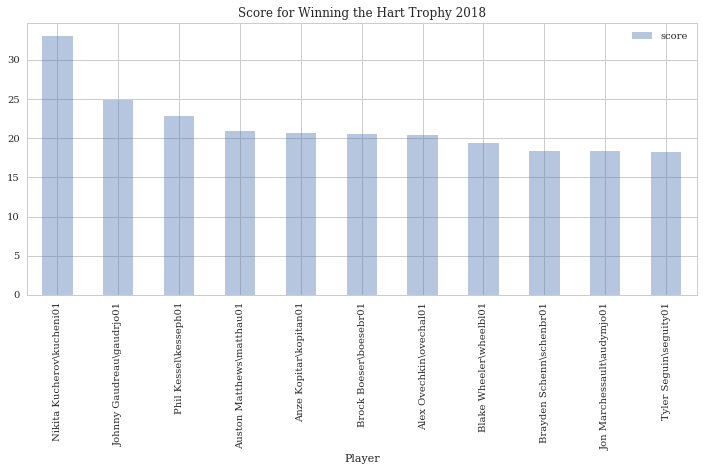

In [131]:
mvps18hist2.plot(kind='bar', style='b', alpha=0.4,
              title='Score for Winning the Hart Trophy 2018')
plt.savefig('probscore2018.png', dpi=300, bbox_inches='tight')

In [121]:
mvps17hist2 = mvps17hist2[0:15]

In [122]:
mvps17hist2

,score
Player,
Brent Burns\burnsbr01,70.792313
Connor McDavid\mcdavco01,68.728356
Brad Marchand\marchbr03,68.337459
Sidney Crosby\crosbsi01,68.079238
Nikita Kucherov\kucheni01,62.253502
Vladimir Tarasenko\tarasvl01,61.211626
Auston Matthews\matthau01,59.638913
David Pastrnak\pastrda01,57.393387
Patrick Kane\kanepa01,54.800411


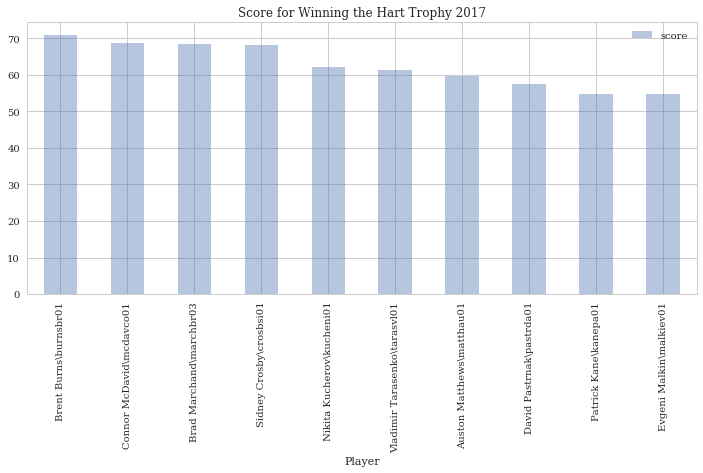

In [126]:
mvps17hist2.plot(kind='bar', style='b', alpha=0.4,
              title='Score for Winning the Hart Trophy 2017')
plt.savefig('probscore2018.png', dpi=300, bbox_inches='tight')

In [124]:
mvps18hist2 = mvps18hist2[0:15]

In [125]:
mvps18hist2

,score
Player,
Nikita Kucherov\kucheni01,33.021599
Johnny Gaudreau\gaudrjo01,24.864553
Phil Kessel\kesseph01,22.824646
Auston Matthews\matthau01,20.944494
Anze Kopitar\kopitan01,20.617995
Brock Boeser\boesebr01,20.484854
Alex Ovechkin\ovechal01,20.444270
Blake Wheeler\wheelbl01,19.336679
Brayden Schenn\schenbr01,18.372942


In [106]:
#somethings above are read as objects AKA read as text. So we want to factorize them int0 factors. Most of these are Y or No
#lets factorize with panda factorize function
# if we have more than zero we want to include we may need to include dummy variables and 1 and 0 for regresion analysis
#convert the non-numerical data to factors

nhl.Player = pd.factorize(nhl.Player)[0]
nhl.Pos = pd.factorize(nhl.Pos)[0]
nhl.Tm = pd.factorize(nhl.Tm)[0]
nhl.Season = pd.factorize(nhl.Season)[0]